<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/Classification_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What will we cover today ?


1.   Four models:

 *   Logistic Rregression (LR)
 *   Random Forest (RF)
 *   Support Vectror Classification (SVR)
 *   Boosting
 *   Naive Bayes


In [ ]:
import numpy as np
import pandas as pd
# Models (Sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Data and Evaluation packages
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
# visualization
import plotly.express as px

[Data description](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [ ]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True)
print(df.data.shape)

(569, 30)


In [ ]:
df.data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

## Unique y values (i.e the labels)

In [ ]:
set(y)

{0, 1}

## Are the feature values scaled/normalized ?

In [ ]:
X.min(), X.max()

(0.0, 4254.0)

## Lets normalize the features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X)
#df_preprocessed = pd.DataFrame(df_all_numeric_scaled, columns=df.columns)

In [ ]:
X_scaled.min(), X_scaled.max()

(0.0, 1.0000000000000002)

In [ ]:
X = X_scaled

## (50-50) % Train-Test splits

In [ ]:
# 50-50% split
train_test_split_point = len(X) // 2
# Split the data into training/testing sets
X_train = X[:train_test_split_point]
X_test = X[train_test_split_point:]
# Split the targets into training/testing sets
y_train = y[:train_test_split_point]
y_test = y[train_test_split_point:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((284, 30), (285, 30), (284,), (285,))

## Training and Testing a LR model

In [ ]:
# Create linear regression object
# regr = LinearRegression()
clf = LogisticRegression()
# Train the model using the training sets
clf.fit(X_train, y_train)

LogisticRegression()

Regression model parameters

In [ ]:
# Make predictions using the testing set
y_pred = clf.predict(X_test)
# The mean squared error
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))

accuracy: 0.98


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

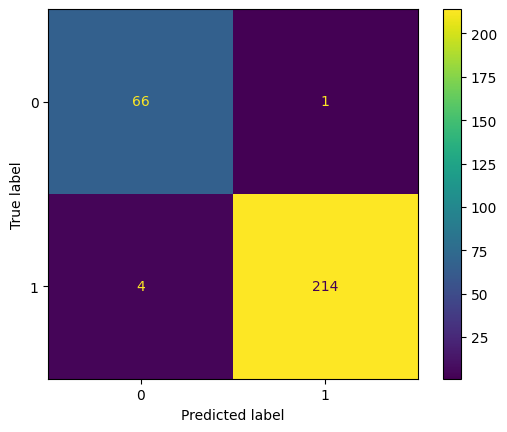

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

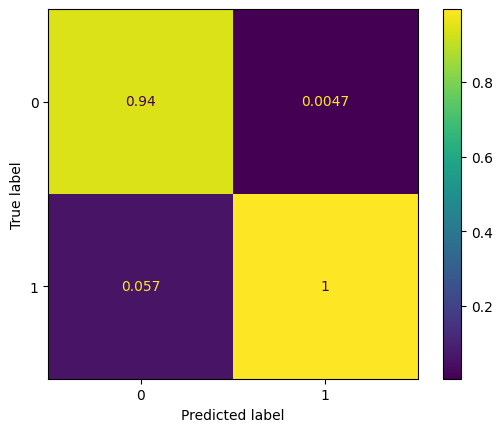

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm/cm.sum(axis=0),
                              display_labels=clf.classes_)
disp.plot()
plt.show()

## Random splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

## Our Wrapper Class (Can take any model as an input)

In [ ]:
from sklearn.model_selection import cross_val_score

class myClassificationModel:
  def __init__(self, model):
    self.model = model
    self.nb_cv_splits = 3
    self.evaluation_metrics = 'accuracy' #'f1'

  def train(self, X, y):
    self.model.fit(X, y)

  def evaluate(self, X, y):
    y_predict = self.model.predict(X)
    # return mean_squared_error(y, y_predict)
    return accuracy_score(y, y_predict)

  def cv_error(self, X, y):
    return cross_val_score(self.model,
                           X,
                           y, scoring=self.evaluation_metrics,
                           cv=self.nb_cv_splits)



## Logistic Regression (LR)

In [ ]:
my_model = myClassificationModel(LogisticRegression())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.9714285714285714
test-error 0.9649122807017544


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.95789474 0.96315789 0.97883598]
cross validation score (mean): 0.9666295368049754
cross validation score (std): 0.00889468485664026


## Random Forest (RF)

In [ ]:
my_model = myClassificationModel(RandomForestClassifier())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 1.0
test-error 0.9649122807017544


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.94736842 0.96842105 0.95238095]
cross validation score (mean): 0.9560568086883876
cross validation score (std): 0.008979133729353014


## Support Vector Classifier (SVC)

In [ ]:
my_model = myClassificationModel(SVC())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.9846153846153847
test-error 0.9736842105263158


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.97368421 0.97894737 0.98412698]
cross validation score (mean): 0.9789195210247842
cross validation score (std): 0.0042632899445391274


## Boosting

In [ ]:
my_model = myClassificationModel(GradientBoostingClassifier())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 1.0
test-error 0.9649122807017544


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.95263158 0.96842105 0.95238095]
cross validation score (mean): 0.9578111946532998
cross validation score (std): 0.007503000206956654


## Naive Bayes

In [ ]:
my_model = myClassificationModel(GaussianNB())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.9472527472527472
test-error 0.9035087719298246


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.91052632 0.94736842 0.93121693]
cross validation score (mean): 0.9297038893530122
cross validation score (std): 0.015078730092791377
